# Name: Hanan Fared Mohamed Omara , ID =  20398559

# Data Science LifeCycle
- Business Understanding 
- Load Dataset
- Data Preprataion
  - Check duplication
  - Check null
  - check unique features
  - visulize data
-Modeling
- Model Evaluation




## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split, cross_val_score

## Load the train dataset

In [26]:
train = pd.read_csv('/content/train.csv')

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
PATH = r'/content/drive/MyDrive/images'
images = os.path.join(PATH, '1.jpg')

### show images

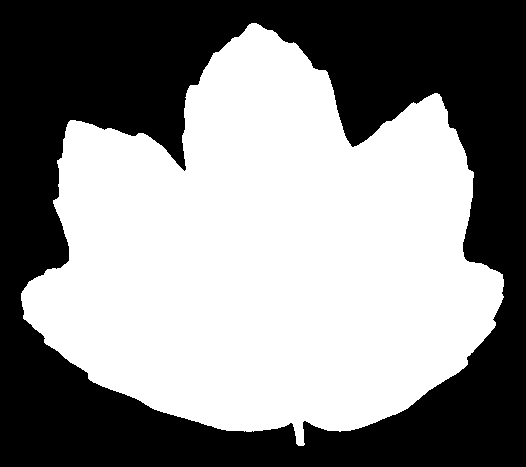

In [29]:
from PIL import Image

#read the image
im = Image.open(images)

#show image
im.show()

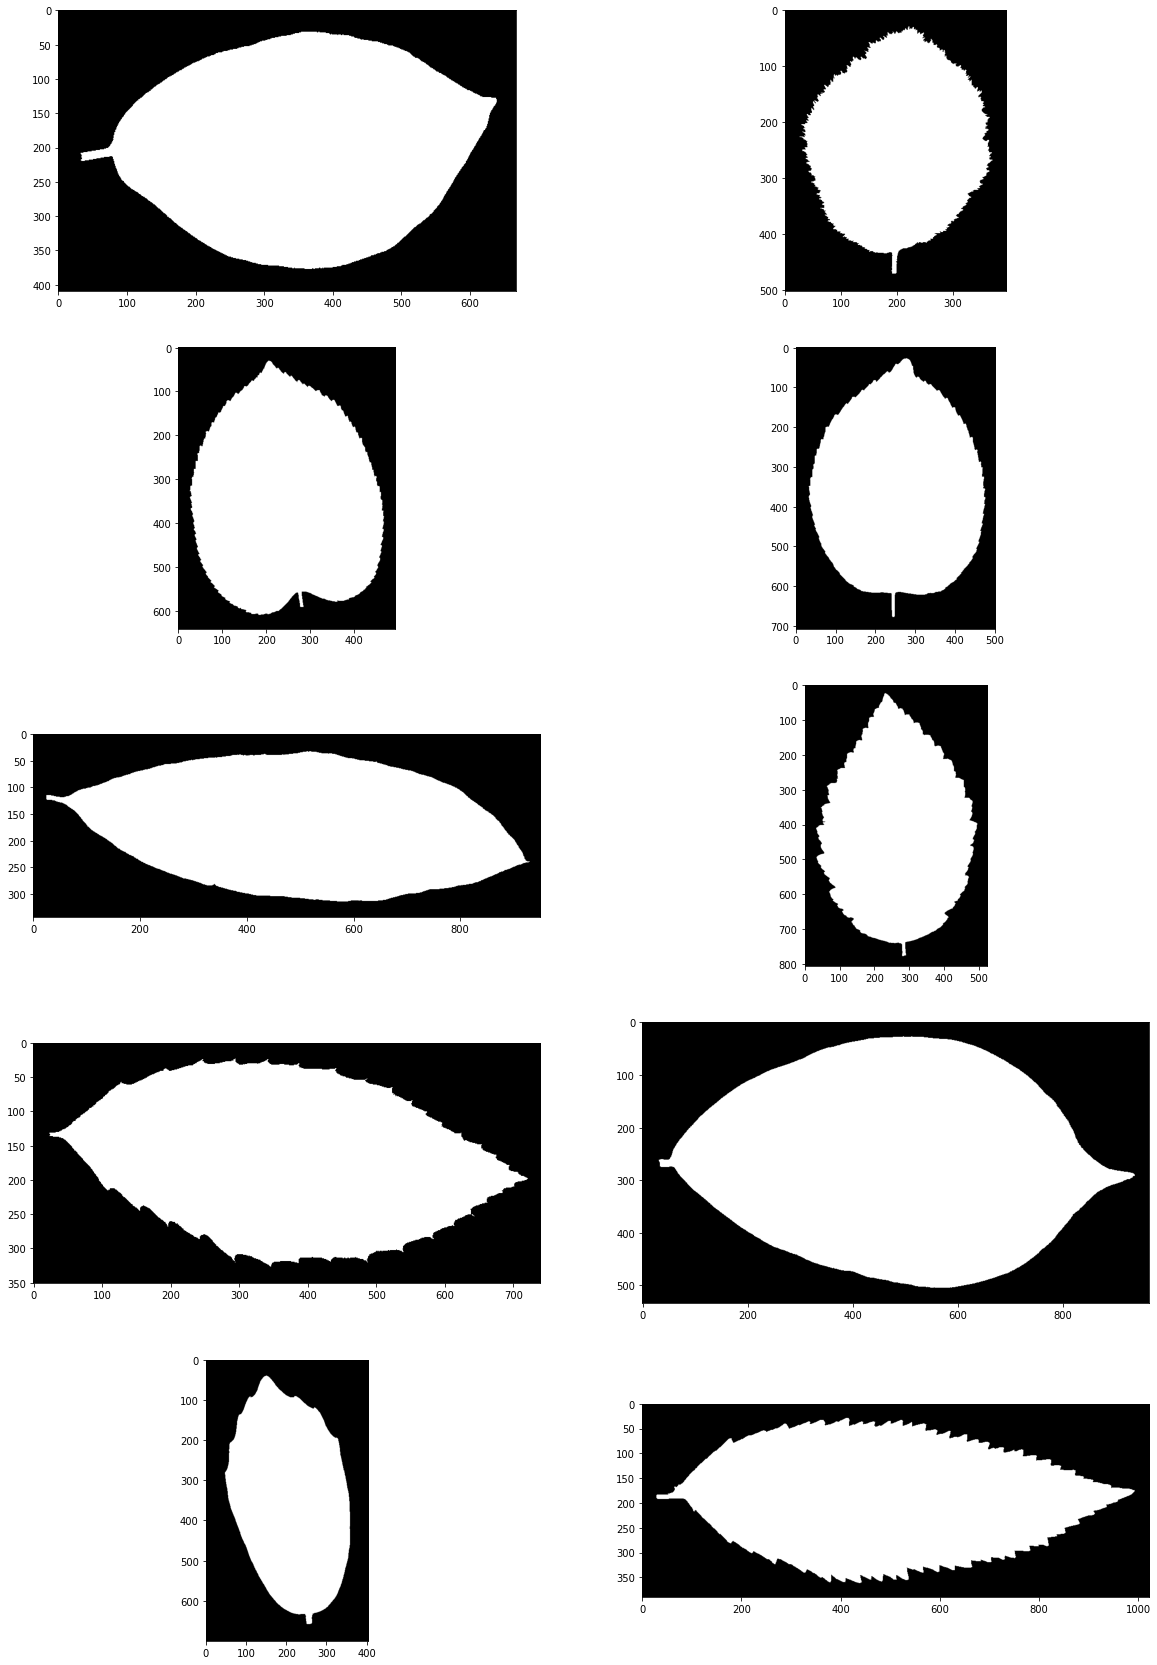

In [30]:
plt.figure(figsize=(20,30))
for i in range(10):
    j=np.random.choice((os.listdir(PATH)))
    plt.subplot(5,2,i+1)
    img=plt.imread(os.path.join(PATH,j))
    plt.imshow(img, cmap='gray')


### Visulaization of data

<AxesSubplot:ylabel='Frequency'>

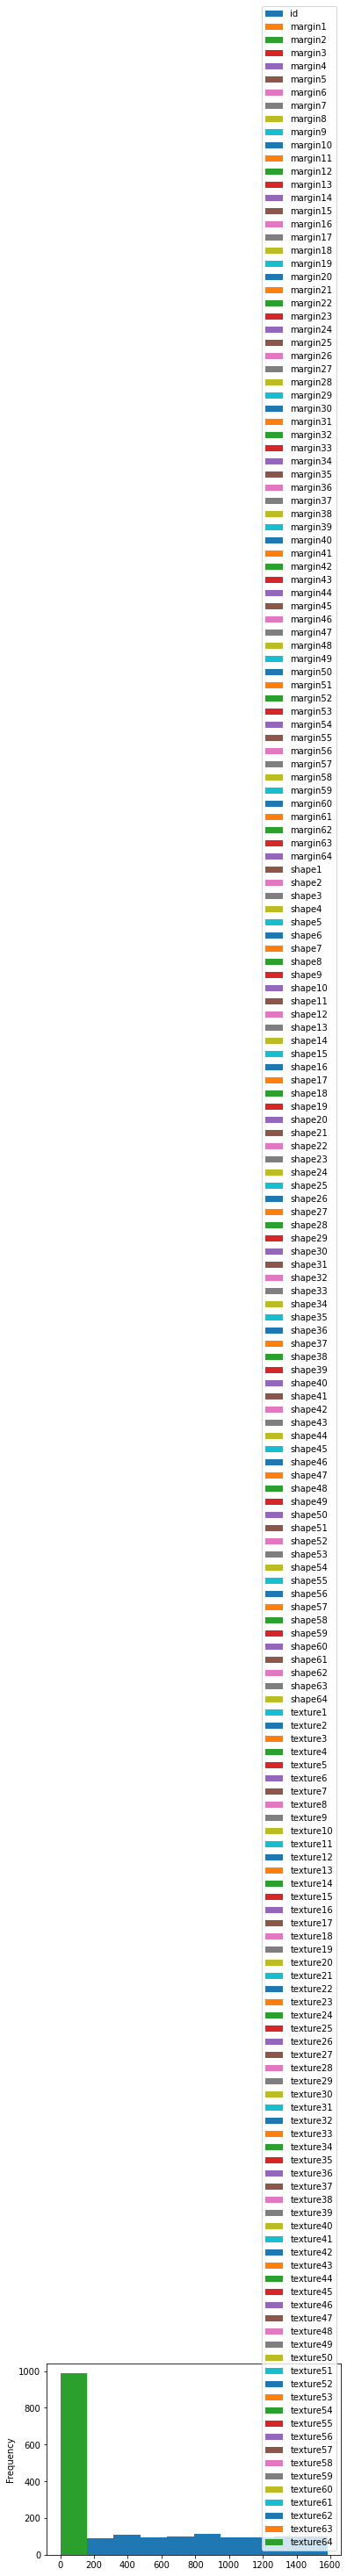

In [31]:
train.plot(kind = 'hist')

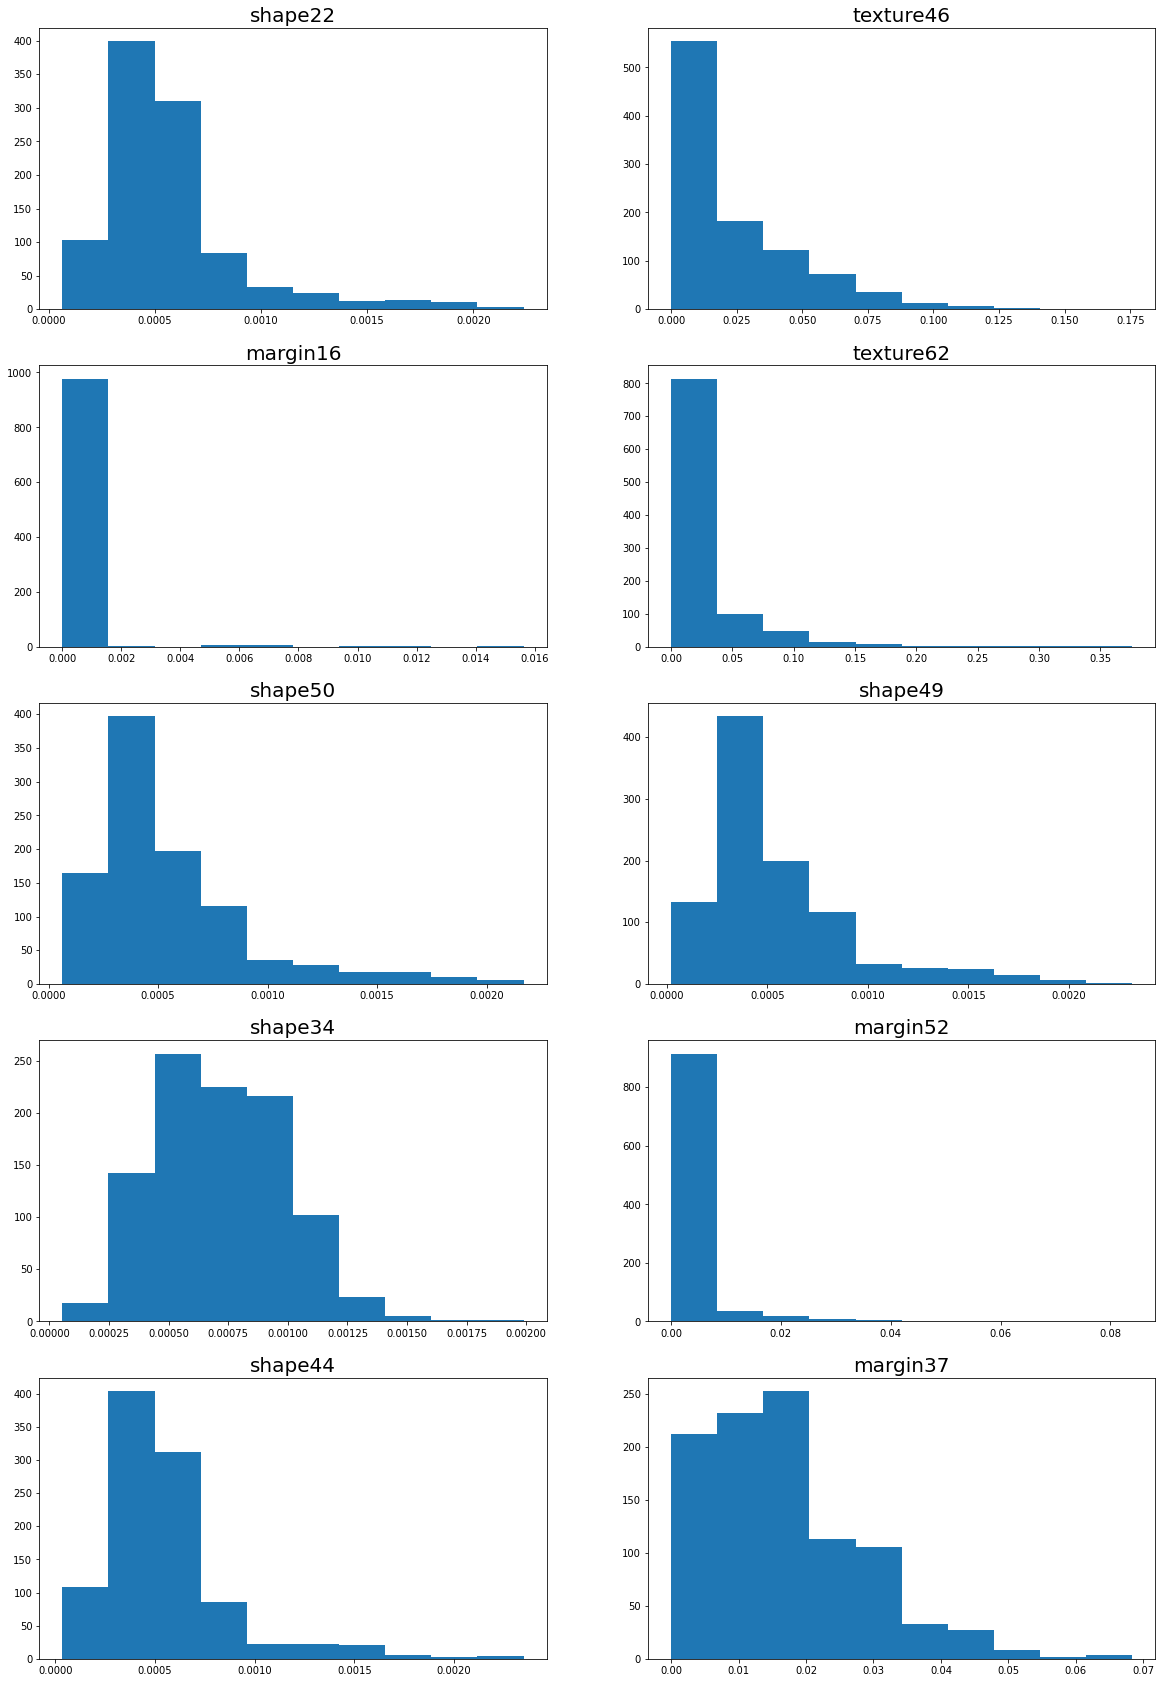

In [32]:
plt.figure(figsize=(20,30))
for i in range(10):
    j=np.random.choice(train.columns[2:])
    plt.subplot(5,2,i+1)
    plt.hist(train[j])
    plt.title(j,fontsize = 20)

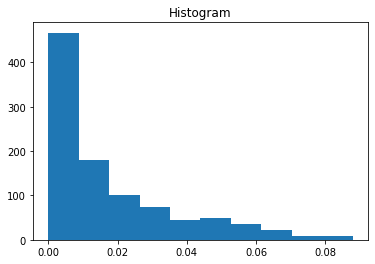

In [33]:
# histogram of total_bills
plt.hist(train["margin1"])
 
plt.title("Histogram")
 
# Adding the legends
plt.show()

## Preprocessing the data

In [34]:
#show the first 5 rows in data
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [35]:
y=train.species
train.drop(['species'], axis=1, inplace=True)

In [36]:
# describe the statistical of data
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


### Check duplicated

In [37]:
#for train dataset 
duplicated= train[train.duplicated()]
duplicated

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64


### Check Null

In [38]:
#check the null cells in train data
train.isnull().sum()

id           0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

### Check unique data


In [39]:
def check_unique(df):
  ls=[]
  for col in df.columns:
    n=df[col].nunique()
    if n==1: ls.append(col)
    elif  n>100 and df[col].dtypes == object:
      ls.append(col)
  return ls

In [40]:
drop_column=check_unique(train)
drop_column

[]

In [41]:
train.drop("id", axis=1, inplace=True)

In [42]:
train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [43]:
# check the correlation between all features to benefits of it if there is any high correlation between features
corr = train.corr()
corr

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
margin1,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,0.397138,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,0.162587,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,0.008772,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,-0.173986,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,-0.320647,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,0.020376,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,-0.127373,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,-0.014200,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,-0.039193,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


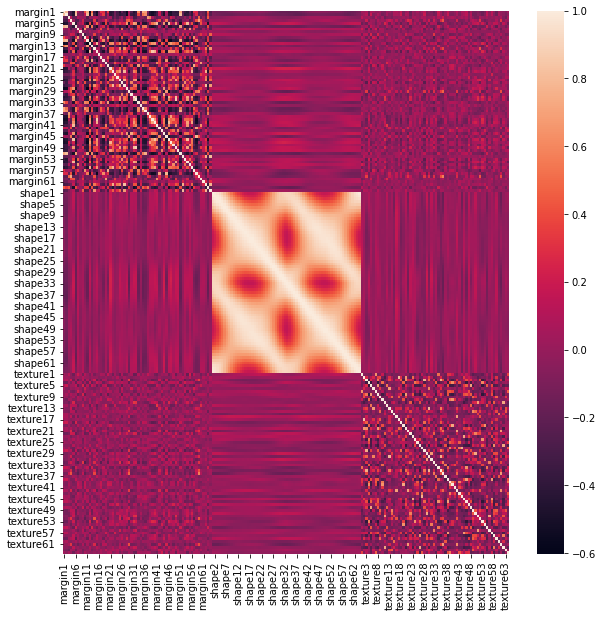

In [44]:
# setting the dimensions of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
# drawing the plot
sns.heatmap(corr)
plt.show()

### Encoding labels 


In [45]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y= label_encoder.fit_transform(y)
  
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

### Spilt the Train_dataset to train data and validation data as train_data represent 80% and vaildation_data represnt 20%

In [46]:
X_train, X_VAL, y_train, y_VAL = train_test_split(train, y, test_size=0.2, random_state=2)



- First, Standarization is to bring down all the features to a common scale without distorting the differences in the range which means the standard deivation of data =1 and Mean =0.
- as we see in the above visualization of our data, it's mean not equal zero and it's satandarid not equal 1 so i will apply standarization on dataset of train 


### Standardization

In [47]:
X_train=(X_train- X_train.mean())/X_train.std()

In [48]:
y_train 

array([ 1, 26, 64, 68, 50, 89, 97, 92, 66, 53, 30, 48, 20, 97, 27, 30,  1,
       53, 76, 43, 13, 97, 98, 34, 75, 60,  9, 74, 18, 18, 89, 92, 13,  2,
        4, 55, 84, 28, 53, 16, 76, 27, 52, 60,  6, 50, 34, 76,  1,  9, 35,
       53, 31, 95,  9,  1, 51, 38, 77, 28, 36, 98, 36, 73, 72, 23, 83, 35,
       38,  6, 91, 84, 11, 17, 94, 37, 84, 67, 64, 63, 89,  6, 62,  5, 44,
       69, 50, 93, 71, 35, 58, 31,  5, 52,  3, 93, 38, 59, 93,  0, 43, 16,
        0, 72, 17, 26, 27, 72, 50, 86, 41, 72, 65, 33, 74, 50, 74, 29, 23,
        4, 25, 15, 22,  5, 83, 73, 94, 73, 10, 98,  0, 45, 28, 69,  8, 71,
       95, 41, 34,  0, 69, 12, 86, 23,  8, 73, 83, 22, 44, 36, 93, 25, 63,
        9, 16, 84,  0, 94, 90, 94, 12, 30, 38, 81, 91, 63, 43, 58, 61, 33,
       81,  3, 80, 75,  0,  4, 39, 25, 91, 31, 49, 42, 55, 57, 68, 89, 86,
       23, 94, 81, 51, 84, 61, 69, 87, 41, 26, 85, 17,  3, 76, 31, 94, 45,
       43,  1, 11, 67, 40, 73, 65, 24, 77, 66, 14, 10,  4, 54, 12, 52, 86,
       55, 54, 24, 23, 46

In [49]:
X_VAL=(X_VAL-X_VAL.mean())/X_VAL.std()

In [50]:
number_of_classes = 99

In [51]:
X_train.shape

(792, 192)

## Build Model

In [75]:
# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

number_of_combinations = 20
#params = p
# Hyperparameters Choices for different combinations
p = {
    "optimizers" : ["SGD", "adam", "rmsprop"],
    "dropout_layer" : [0, 0.2, 0.5],
    "batch_size" : [10, 15, 40],
    "learning rate":[0.01,0.001,0.1]
}


model = tf.keras.Sequential(
    [tf.keras.Input(shape = (192,) ),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')])
# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                3860      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 99)                2079      
                                                                 
Total params: 5,939
Trainable params: 5,939
Non-trainable params: 0
_________________________________________________________________


### when batch size=10 with fixed other parameters

In [77]:
# first using different batch size,here when equal 10
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=10, validation_data=[X_VAL, y_VAL])

  

Epoch 1/100
80/80 [==============================] - 1s 6ms/step - loss: 4.6260 - accuracy: 0.0152 - val_loss: 4.5384 - val_accuracy: 0.0354
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 4.4695 - accuracy: 0.0467 - val_loss: 4.4135 - val_accuracy: 0.0808
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 4.3216 - accuracy: 0.0821 - val_loss: 4.3050 - val_accuracy: 0.1111
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 4.2030 - accuracy: 0.1010 - val_loss: 4.2099 - val_accuracy: 0.1313
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 4.1019 - accuracy: 0.1503 - val_loss: 4.1214 - val_accuracy: 0.1818
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 3.9867 - accuracy: 0.1755 - val_loss: 4.0378 - val_accuracy: 0.2020
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 3.8943 - accuracy: 0.2348 - val_loss: 3.9630 - val_accuracy: 0.2222
Epoch 8/100
8

In [78]:
score = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9040403962135315


### when batch size=15 with fixed other parameters

In [ ]:
# first using different batch size,here when equal 15
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=15, validation_data=[X_VAL, y_VAL])


Epoch 1/100
80/80 [==============================] - 1s 6ms/step - loss: 4.6260 - accuracy: 0.0152 - val_loss: 4.5384 - val_accuracy: 0.0354
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 4.4695 - accuracy: 0.0467 - val_loss: 4.4135 - val_accuracy: 0.0808
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 4.3216 - accuracy: 0.0821 - val_loss: 4.3050 - val_accuracy: 0.1111
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 4.2030 - accuracy: 0.1010 - val_loss: 4.2099 - val_accuracy: 0.1313
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 4.1019 - accuracy: 0.1503 - val_loss: 4.1214 - val_accuracy: 0.1818
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 3.9867 - accuracy: 0.1755 - val_loss: 4.0378 - val_accuracy: 0.2020
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 3.8943 - accuracy: 0.2348 - val_loss: 3.9630 - val_accuracy: 0.2222
Epoch 8/100
8

In [79]:
score = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9040403962135315


###  when batch size=20 with fixed other parameters

In [83]:
# first using different batch size,here when equal 20
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=20, validation_data=[X_VAL, y_VAL])


Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.0803 - accuracy: 0.9949 - val_loss: 0.1897 - val_accuracy: 0.9545
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9962 - val_loss: 0.1891 - val_accuracy: 0.9545
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9899 - val_loss: 0.1890 - val_accuracy: 0.9545
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9962 - val_loss: 0.1889 - val_accuracy: 0.9545
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9937 - val_loss: 0.1890 - val_accuracy: 0.9545
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9962 - val_loss: 0.1884 - val_accuracy: 0.9545
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0768 - accuracy: 0.9937 - val_loss: 0.1879 - val_accuracy: 0.9545
Epoch 8/100
4

In [ ]:
score = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

- try different types of optimizers,first ' sgd ' as we try above
- now,try 'Adam ' optimizer

In [81]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=20, validation_data=[X_VAL, y_VAL])


Epoch 1/100
40/40 [==============================] - 2s 11ms/step - loss: 0.7260 - accuracy: 0.9583 - val_loss: 0.9607 - val_accuracy: 0.9040
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.9634 - val_loss: 0.9214 - val_accuracy: 0.9091
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.9684 - val_loss: 0.8870 - val_accuracy: 0.9091
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6577 - accuracy: 0.9621 - val_loss: 0.8553 - val_accuracy: 0.9192
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6047 - accuracy: 0.9659 - val_loss: 0.8248 - val_accuracy: 0.9091
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 0.5926 - accuracy: 0.9609 - val_loss: 0.7914 - val_accuracy: 0.9242
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.9722 - val_loss: 0.7629 - val_accuracy: 0.9192
Epoch 8/100


In [84]:
e = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9040403962135315


- try ' RMSProp ' optimizer

In [85]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=20, validation_data=[X_VAL, y_VAL])


Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 0.0814 - accuracy: 0.9937 - val_loss: 0.1820 - val_accuracy: 0.9545
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9937 - val_loss: 0.1803 - val_accuracy: 0.9495
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9962 - val_loss: 0.1840 - val_accuracy: 0.9545
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9596
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9962 - val_loss: 0.1946 - val_accuracy: 0.9495
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9975 - val_loss: 0.1863 - val_accuracy: 0.9596
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9962 - val_loss: 0.1856 - val_accuracy: 0.9697
Epoch 8/100
4

In [ ]:
e = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

- try different dropout first above=0
- now, try dropout= 0.2

In [86]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape = (192,) ),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')])
# summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                3860      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 99)                2079      
                                                                 
Total params: 5,939
Trainable params: 5,939
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=100, batch_size=20, validation_data=[X_VAL, y_VAL])

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 4.4841 - accuracy: 0.0366 - val_loss: 4.3617 - val_accuracy: 0.0354
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 4.1558 - accuracy: 0.1111 - val_loss: 4.1664 - val_accuracy: 0.0707
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 3.9138 - accuracy: 0.2071 - val_loss: 3.9984 - val_accuracy: 0.1111
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 3.7337 - accuracy: 0.2816 - val_loss: 3.8510 - val_accuracy: 0.2222
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 3.5550 - accuracy: 0.3624 - val_loss: 3.7197 - val_accuracy: 0.2525
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 3.4108 - accuracy: 0.4078 - val_loss: 3.5976 - val_accuracy: 0.3081
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 3.2767 - accuracy: 0.4785 - val_loss: 3.4877 - val_accuracy: 0.3384
Epoch 8/100
4

In [88]:
e = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9040403962135315


- try dropout=0.5

In [89]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape = (192,) ),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')])
# summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                3860      
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 99)                2079      
                                                                 
Total params: 5,939
Trainable params: 5,939
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history= model.fit(X_train,y_train, epochs=100, batch_size=20, validation_data=[X_VAL, y_VAL])


Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 4.6049 - accuracy: 0.0126 - val_loss: 4.4363 - val_accuracy: 0.0404
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 4.3780 - accuracy: 0.0442 - val_loss: 4.2901 - val_accuracy: 0.0606
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 4.1646 - accuracy: 0.0833 - val_loss: 4.1513 - val_accuracy: 0.1263
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 4.0319 - accuracy: 0.1086 - val_loss: 4.0272 - val_accuracy: 0.1717
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 3.8912 - accuracy: 0.1679 - val_loss: 3.9134 - val_accuracy: 0.2525
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 3.8052 - accuracy: 0.1843 - val_loss: 3.8200 - val_accuracy: 0.2828
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 3.6751 - accuracy: 0.2437 - val_loss: 3.7358 - val_accuracy: 0.2879
Epoch 8/100
4

In [93]:
e = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9040403962135315


- try different values of learning rate
- first, learning rate =0.01

In [95]:
from keras.optimizers import Adam, SGD, RMSprop
optimizer=SGD(0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=100, batch_size=10, validation_data=[X_VAL, y_VAL])

Epoch 1/100
80/80 [==============================] - 1s 5ms/step - loss: 1.1788 - accuracy: 0.7967 - val_loss: 1.2172 - val_accuracy: 0.8990
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 1.2066 - accuracy: 0.7866 - val_loss: 1.2033 - val_accuracy: 0.9091
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 1.1621 - accuracy: 0.8030 - val_loss: 1.1924 - val_accuracy: 0.9040
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 1.1689 - accuracy: 0.7980 - val_loss: 1.1796 - val_accuracy: 0.8990
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 1.1918 - accuracy: 0.8018 - val_loss: 1.1677 - val_accuracy: 0.8990
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 1.1519 - accuracy: 0.8093 - val_loss: 1.1572 - val_accuracy: 0.9040
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 1.1432 - accuracy: 0.8182 - val_loss: 1.1454 - val_accuracy: 0.9091
Epoch 8/100
8

In [96]:
e = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9040403962135315


- using learning rate =0.001

In [97]:
from keras.optimizers import Adam, SGD, RMSprop
optimizer=SGD(0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100, batch_size=10, validation_data=[X_VAL, y_VAL])

Epoch 1/100
80/80 [==============================] - 1s 7ms/step - loss: 0.7554 - accuracy: 0.8359 - val_loss: 0.6022 - val_accuracy: 0.9495
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7367 - accuracy: 0.8624 - val_loss: 0.5995 - val_accuracy: 0.9495
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7177 - accuracy: 0.8586 - val_loss: 0.6002 - val_accuracy: 0.9343
Epoch 4/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7401 - accuracy: 0.8573 - val_loss: 0.5973 - val_accuracy: 0.9394
Epoch 5/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7478 - accuracy: 0.8396 - val_loss: 0.5931 - val_accuracy: 0.9444
Epoch 6/100
80/80 [==============================] - 1s 10ms/step - loss: 0.7490 - accuracy: 0.8510 - val_loss: 0.5885 - val_accuracy: 0.9444
Epoch 7/100
80/80 [==============================] - 0s 6ms/step - loss: 0.7401 - accuracy: 0.8573 - val_loss: 0.5841 - val_accuracy: 0.9495
Epoch 8/100


In [ ]:
e = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

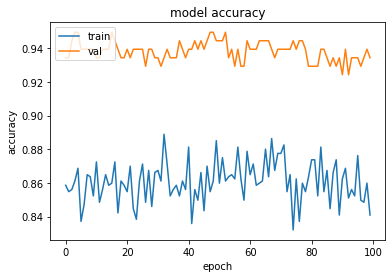

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- using learning rate=0.1

In [101]:
from keras.optimizers import Adam, SGD, RMSprop
optimizer=SGD(0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history=model.fit(X_train,y_train, epochs=100, batch_size=10, validation_data=[X_VAL, y_VAL])

Epoch 1/100
80/80 [==============================] - 1s 4ms/step - loss: 0.5352 - accuracy: 0.8586 - val_loss: 0.3663 - val_accuracy: 0.9343
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.8548 - val_loss: 0.3658 - val_accuracy: 0.9343
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5278 - accuracy: 0.8561 - val_loss: 0.3639 - val_accuracy: 0.9444
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.8611 - val_loss: 0.3639 - val_accuracy: 0.9495
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.8687 - val_loss: 0.3636 - val_accuracy: 0.9495
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.8371 - val_loss: 0.3659 - val_accuracy: 0.9394
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.8472 - val_loss: 0.3656 - val_accuracy: 0.9394
Epoch 8/100
8

In [99]:
e = model.evaluate(X_VAL, y_VAL, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9040403962135315


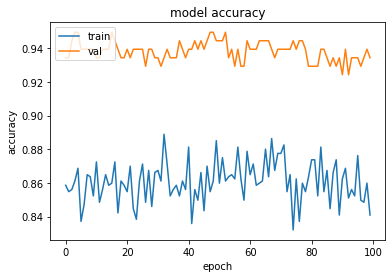

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()